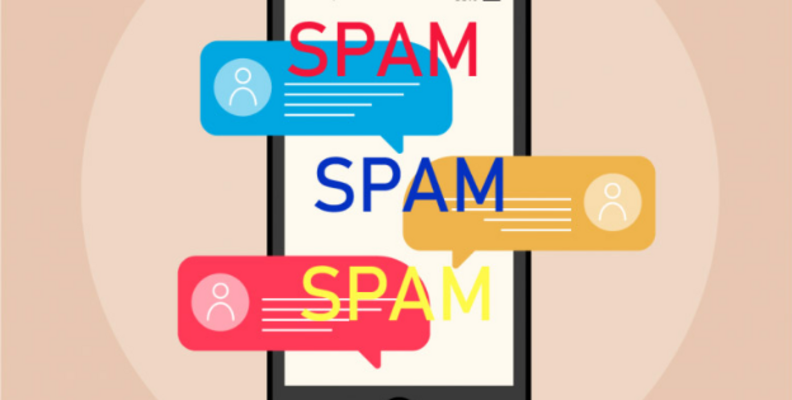

Data source: https://www.kaggle.com/datasets/mariumfaheem666/spam-sms-classification-using-nlp

This notebook is based on Deep learning and it contains 3 parts.

Part 1: Data loading and analysis (main tools: Pandas and Matplotlib )

Part 2: Data preprocessing(main tools: Tensorflow, Nltk, Numpy, Matplotlib)

Part 3: Modeling and evaluating (main tools: Tensorflow, Matplotlib, Scikit-Learn)

# Part 1

#### Data loading and analysis

In [93]:
# Import necessary libraries for data processing and model building
from pandas import read_csv 
from matplotlib.pyplot import pie  , title , show , legend , xlabel , ylabel , plot
from numpy import array
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding , Dense , GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix

tokenizer = Tokenizer(oov_token='<00U00>')

In [94]:
# Data loading
file = read_csv('Spam_SMS.csv')
df = file.copy()
df.sample(10)

,Class,Message
3281,ham,Badrith is only for chennai:)i will surely pic...
38,ham,Anything lor... U decide...
4104,spam,U have a secret admirer who is looking 2 make ...
3198,ham,So its to be poking man everyday that they tea...
5285,ham,"Yeah, probably here for a while"
2471,ham,Eat at old airport road... But now 630 oredi.....
5041,spam,Natalie (20/F) is inviting you to be her frien...
1221,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...
4360,ham,Ü only send me the contents page...
3197,ham,"I av a new number, . Wil u only use this one,ta."


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [96]:
df.isnull().sum()

Class      0
Message    0
dtype: int64

In [97]:
df.duplicated().sum()

415

In [98]:
# Removing duplicated data
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5159 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5159 non-null   object
 1   Message  5159 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


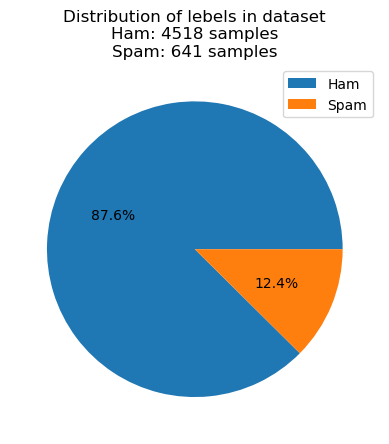

In [99]:
vals = df.Class.value_counts().values
pie(vals,autopct='%1.1f%%')
legend(['Ham','Spam'])
title(f'Distribution of lebels in dataset\nHam: {vals[0]} samples\nSpam: {vals[1]} samples')
show()

# Part 2

#### Data preprocessing

In [100]:
# Encoding Labels to 0 and 1
class_dict = {'ham':0,'spam':1}
encoded_label = array([class_dict[i] for i in df.Class],dtype='int64')
encoded_label[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5159 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5159 non-null   object
 1   Message  5159 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [102]:
# Removing stop words from texts
stop_words = list(set(stopwords.words('English')))

def Filter(text)->str:
    '''Function docstring'''
    res = [word for word in text.lower().split() if word not in stop_words]
    return ' '.join(res)

features = [Filter(Text) for Text in df.Message]

In [103]:
for i in range(5):
    print(f'Original text: {df.Message[i]}\n')
    print(f'Text after removing stop words: {features[i]}')
    print('_'*50)

Original text: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Text after removing stop words: go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...
__________________________________________________
Original text: Ok lar... Joking wif u oni...

Text after removing stop words: ok lar... joking wif u oni...
__________________________________________________
Original text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Text after removing stop words: free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's
__________________________________________________
Original text: U dun say so early hor... U c already then say...

Text after removing stop words: u dun say early hor... u c already say...
_

In [104]:
# Tokenizing texts and making a dataset to train
tokenizer.fit_on_texts(features)
sequneces = tokenizer.texts_to_sequences(features)
matrix = pad_sequences(sequneces,
                       padding='post',
                       truncating='post',
                       maxlen=16)

In [105]:
# Spliting dataset to train and test sets
size = int(input('Enter train size in percent:'))
idx = (size*len(matrix))//100
xtr , ytr = matrix[:idx] , encoded_label[:idx]
xts , yts = matrix[idx:] , encoded_label[idx:]

Enter train size in percent: 90


In [106]:
print(f'Train size: {len(xtr)}\nValidation size: {len(xts)}')

Train size: 4643
Validation size: 516


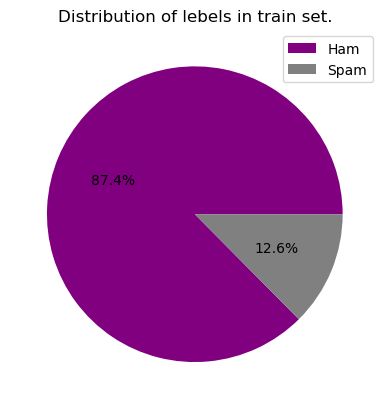

In [107]:
pie([ytr.tolist().count(0),
     ytr.tolist().count(1)],
    autopct='%1.1f%%',
    colors=['purple','gray'])
legend(['Ham','Spam'])
title('Distribution of lebels in train set.')
show()

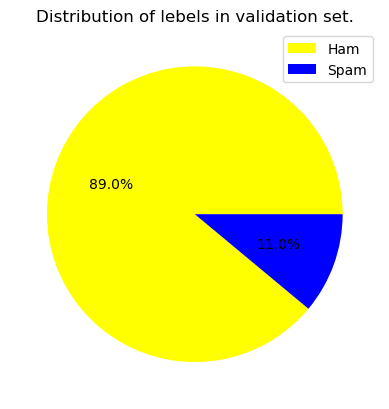

In [108]:
pie([yts.tolist().count(0),
     yts.tolist().count(1)],
    autopct='%1.1f%%',
    colors=['yellow','blue'])
legend(['Ham','Spam'])
title('Distribution of lebels in validation set.')
show()

# Part 3

#### Modeling and evaluating

In [109]:
# Create a sequential model
model = Sequential([Embedding(len(tokenizer.word_index)+1,2),
                   GlobalMaxPooling1D(),
                   Dense(1,activation='sigmoid')])

# Compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [110]:
history = model.fit(xtr,ytr,epochs=50,validation_data=(xts,yts))

Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8582 - loss: 0.5299 - val_accuracy: 0.8895 - val_loss: 0.2874
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.2927 - val_accuracy: 0.8895 - val_loss: 0.2446
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - loss: 0.2604 - val_accuracy: 0.8895 - val_loss: 0.2347
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.2526 - val_accuracy: 0.8973 - val_loss: 0.2292
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - loss: 0.2588 - val_accuracy: 0.9147 - val_loss: 0.2243
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9044 - loss: 0.2529 - val_accuracy: 0.9167 - val_loss: 0.2196
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9133 - loss: 0.2472 - val_accuracy: 0.9341 - val_loss: 0.2149
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9353 - loss: 0.2260 - val_accuracy: 0.

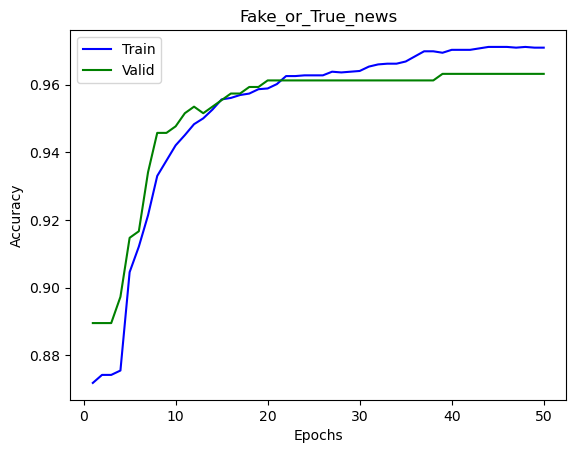

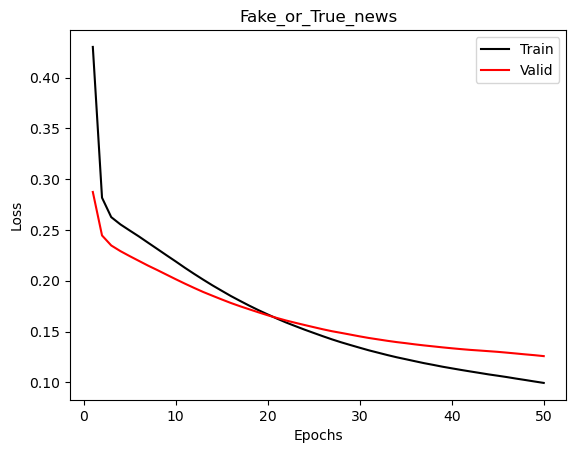

In [111]:
# Plot the results to visualize performance metrics or data distribution
epoch = range(1,len(history.epoch)+1)
results = history.history
plot(epoch,results['accuracy'],'blue')
plot(epoch,results['val_accuracy'],'green')
xlabel('Epochs')
ylabel('Accuracy')
title('Fake_or_True_news')
legend(['Train','Valid'])
show()
plot(epoch,results['loss'],'black')
plot(epoch,results['val_loss'],'red')
xlabel('Epochs')
ylabel('Loss')
title('Fake_or_True_news')
legend(['Train','Valid'])
show()

In [112]:
# Use the trained model to make predictions
pred = model.predict(matrix)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


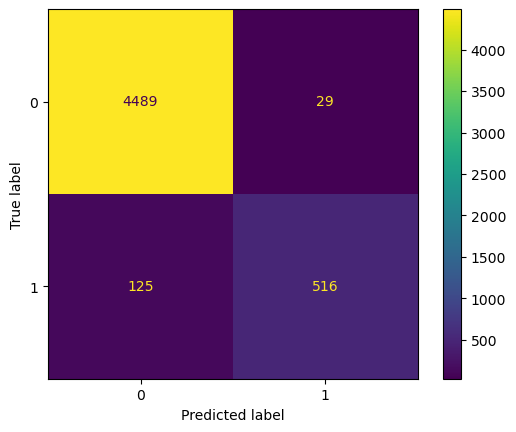

In [113]:
# Plot the results to visualize performance metrics or data distribution
Pred = list()
for p in pred:
    if p[0]<0.5: Pred.append(0)
    else: Pred.append(1)

con = confusion_matrix(encoded_label.tolist(),Pred)

display = ConfusionMatrixDisplay(con)
display.plot()

Developed by Pourea Ziasistani

Email: poureaziasistani@gmail.com

Linkedin: https://www.linkedin.com/in/pourea-ziasistani-b58972238/

# End